In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## Exercise 1: K-Fold

In [6]:
X = np.array(np.arange(1,21).reshape(10,-1))
y = np.array(np.arange(1,11))

kf = KFold(n_splits=5)

fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold: {fold}")
    print("TRAIN:", train_index, "TEST:", test_index)
    fold += 1



Fold: 1
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
Fold: 2
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
Fold: 3
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
Fold: 4
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
Fold: 5
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]


## Exercise 2: Cross validation (k-fold)


In [15]:


# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
# split data train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=43)
# pipeline
pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())]
pipe = Pipeline(pipeline)

cv_results = cross_validate(pipe, X_train, y_train, cv=10, return_train_score=False)

cv_results_df = pd.DataFrame(cv_results)

display(cv_results_df)

# Extract the scores
scores = cv_results['test_score']

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_dev = scores.std()

scores, mean_score, std_dev

print(f"Scores on validation sets: \n{scores}")
print(f"Mean of scores on validation sets:  \n{mean_score}")
print(f"Standard deviation of scores on validation sets:  \n{std_dev}")


,fit_time,score_time,test_score
0,0.027572,0.006858,0.624336
1,0.030396,0.002849,0.616490
2,0.019637,0.004227,0.624866
3,0.028830,0.004418,0.598910
4,0.020337,0.001323,0.592843
5,0.013348,0.001799,0.613071
6,0.020013,0.004773,0.546303
7,0.034664,0.002263,0.607430
8,0.013287,0.002311,0.600146
9,0.022171,0.001240,0.595745


Scores on validation sets: 
[0.62433594 0.61648956 0.62486602 0.59891024 0.59284295 0.61307055
 0.54630341 0.60742976 0.60014575 0.59574508]
Mean of scores on validation sets:  
0.6020139252674299
Standard deviation of scores on validation sets:  
0.021498382277346524


## Exercise 3: GridsearchCV


In [28]:
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
# split data train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=43)

rf = RandomForestRegressor()

parameters = {'n_estimators':[10, 50, 75],
                'max_depth':[1,10,20]
             }


gridsearch = GridSearchCV(rf,
                        parameters,
                        cv = 5,
                        n_jobs=-1,
                        )

gridsearch.fit(X_train, y_train)

print(f"Best estimator: {gridsearch.best_estimator_}")
print("-" * 100)
print(f"Best parameters: {gridsearch.best_params_}")
print("-" * 100)
print(f"Best score: {gridsearch.best_score_}")
print("-" * 100)
print(f"results: {gridsearch.cv_results_}")

Best estimator: RandomForestRegressor(max_depth=20, n_estimators=75)
----------------------------------------------------------------------------------------------------
Best parameters: {'max_depth': 20, 'n_estimators': 75}
----------------------------------------------------------------------------------------------------
Best score: 0.8070852214250008
----------------------------------------------------------------------------------------------------
results: {'mean_fit_time': array([0.08936567, 0.45827556, 0.6157074 , 0.68628078, 3.42426381,
       5.16659675, 1.10568867, 5.30343885, 6.38607597]), 'std_fit_time': array([0.00364035, 0.04481678, 0.04498964, 0.04166295, 0.06821181,
       0.12378239, 0.0740291 , 0.15528539, 0.53054587]), 'mean_score_time': array([0.00166817, 0.00269628, 0.00445743, 0.00369296, 0.0218914 ,
       0.02222824, 0.01378579, 0.04287424, 0.0493454 ]), 'std_score_time': array([0.00069637, 0.00083511, 0.00186182, 0.00152574, 0.00700988,
       0.00259929, 0.00

In [29]:
gridsearch.score(X_test, y_test)

0.8127797348876079

## Exercise 4: Validation curve and Learning curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  75 | elapsed:  4.0min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.6min finished


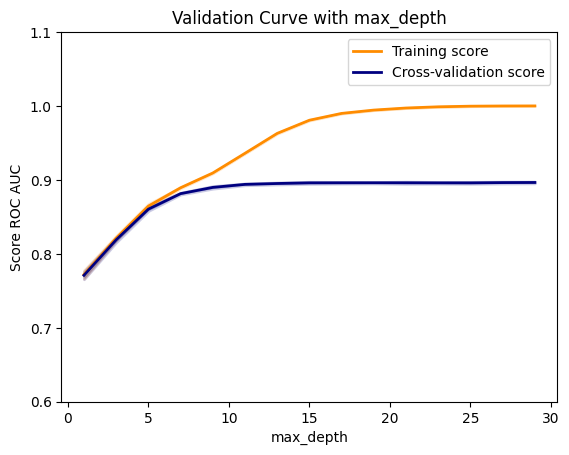

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing


X, y = make_classification(n_samples=100000,
                        n_features= 30,
                        n_informative=10,
                        flip_y=0.2 )

clf = RandomForestClassifier(max_depth=10)

param_range = np.arange(1,30,2)

train_scores, test_scores = validation_curve(clf,
                                            X,
                                            y,
                                            param_name="max_depth",
                                            param_range=param_range,
                                            scoring="roc_auc",
                                            n_jobs=-1,
                                            verbose=2
                                            )


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve with max_depth")
plt.xlabel("max_depth")
plt.ylabel("Score ROC AUC")
plt.ylim(0.6, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
import time
from sklearn.model_selection import learning_curve

# Define your model
clf = RandomForestClassifier(max_depth=12)

# Prepare the training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize arrays to store the results
train_sizes_abs, train_scores, test_scores, fit_times, _ = learning_curve(
    clf, X, y, cv=10, train_sizes=train_sizes, return_times=True, scoring='roc_auc', n_jobs=-1)

# Calculate the mean and standard deviation for the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate the mean and standard deviation for the fit times
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot Learning Curve
plt.figure(figsize=(24, 6))
plt.subplot(131)
plt.grid(True)  # Enable grid

plt.title("Learning Curves of Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.70,1)
plt.fill_between(train_sizes_abs, train_scores_mean, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

# Plot Scalability of the model
plt.subplot(132)
plt.title("Scalability of the Model")
plt.xlabel("Training examples")
plt.ylabel("Fit times")
plt.grid(True)  # Enable grid
plt.plot(train_sizes_abs, fit_times_mean, 'o-')

# Plot Performance of the Model
plt.subplot(133)
plt.title("Performance of the Model")
plt.xlabel("Fit times")
plt.ylabel("Score")
plt.grid(True)  # Enable grid
plt.plot(fit_times_mean, test_scores_mean, 'o-')
plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)

plt.tight_layout()
plt.show()